# **COMPUTER VISION TECHNIQUES - part 1**
## By: Ayush Adarsh
### Notebook no. : 3


## Link to Hand-written Notes: [3-Computer Vision Techniques-part1](https://drive.google.com/file/d/1P2WD5OdXmnp_BwjwJfoAzKP_TANSJghT/view?usp=sharing)

# **1. Image Formation**

## 2-D image from a real world 3-D View

### **Pinhole Camera Model**

The pinhole camera model transforms 3D world coordinates \((X, Y, Z)\) into 2D image coordinates \((u, v)\) using the following formula:

$$
\begin{bmatrix}
u \\
v \\
1
\end{bmatrix}
=
\frac{1}{Z}
\begin{bmatrix}
f_x & 0 & c_x \\
0 & f_y & c_y \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
X \\
Y \\
Z
\end{bmatrix}
$$

Where:

- $(X, Y, Z)$: 3D world coordinates. (unit: m (metres))
- $(u, v)$: 2D image coordinates. (unit: pixels)
- $(f_x, f_y)$: Focal lengths in pixels (along $x$ and $y$). (unit: pixels)
- $(c_x, c_y)$: Principal point (center of the image). (unit: pixels)
- $Z$: Depth of the point in the scene. (unit: m (metres))


**Note-** Take $(f_x, f_y)$, $(u, v)$, $(c_x,c_y)$ in pixels and $(X,Y,Z)$ in metres




Code

In [ ]:
import numpy as np

def project_3d_to_2d(points_3d, fx, fy, cx, cy):
    """
    Projects 3D points onto a 2D image plane using the pinhole camera model.

    :param points_3d: Array of 3D points (N x 3).
    :param fx, fy: Focal lengths in x and y directions.
    :param cx, cy: Principal point offsets.
    :return: Array of 2D points (N x 2).
    """
    # Camera matrix
    K = np.array([
        [fx, 0, cx],
        [0, fy, cy],
        [0,  0,  1]
    ])

    # Project points
    projected_points = []
    for point in points_3d:
        X, Y, Z = point
        if Z == 0:
            continue  # Avoid division by zero
        homogeneous_point = np.array([X, Y, Z])
        pixel_coords = np.dot(K, homogeneous_point) / Z
        projected_points.append(pixel_coords[:2])  # Take only (u, v)

    return np.array(projected_points)

# Example 3D points
points_3d = np.array([
    [1, 1, 5],
    [-1, -1, 5],
    [2, 2, 10],
    [-2, -2, 10]
])

# Camera parameters
fx, fy = 800, 800  # Focal length in pixels
cx, cy = 400, 400  # Principal point (center of image)

# Project points
points_2d = project_3d_to_2d(points_3d, fx, fy, cx, cy)
print("Projected 2D points:\n", points_2d)


Projected 2D points:
 [[560. 560.]
 [240. 240.]
 [560. 560.]
 [240. 240.]]


#  **2. Image Transformation**

In [2]:
import cv2
import matplotlib.pyplot as plt

image_path = 'Cat.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (256, 256))

(-0.5, 255.5, 255.5, -0.5)

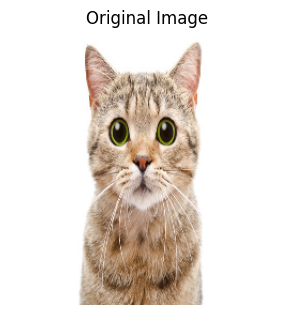

In [3]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(resized_image)
plt.title("Original Image")
plt.axis("off")

## A. Orthogonal Transformation (Rotation)



Orthogonal transformations can be expressed mathematically using a rotation matrix:

\[
\begin{aligned}
    \text{For a point } (x, y) \text{ in the original image, the transformed point } (x', y') \text{ is given by:} \\
    \begin{bmatrix}
    x' \\
    y'
    \end{bmatrix} =
    \begin{bmatrix}
    \cos \theta & -\sin \theta \\
    \sin \theta & \cos \theta
    \end{bmatrix}
    \begin{bmatrix}
    x - x_c \\
    y - y_c
    \end{bmatrix} +
    \begin{bmatrix}
    x_c \\
    y_c
    \end{bmatrix}
\end{aligned}
\]

Where:
- $(x, y)$: Original coordinates.
- $(x', y')$: Transformed coordinates.
- $(x_c, y_c)$: Center of rotation (image center).
- $(θ)$: Rotation angle (in degrees, converted to radians internally).
- The matrix $(\begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix})$ performs the rotation around the origin.
- Translation $(\begin{bmatrix} x_c \\ y_c \end{bmatrix})$ repositions the rotated image.

---

### **Use Cases**

Orthogonal transformations are widely used in computer vision and image processing for the following purposes:

1. **Augmentation in Deep Learning**:
   - To artificially increase the size of datasets by applying transformations like rotation.

2. **Geometric Corrections**:
   - To adjust images taken from different angles for alignment.

3. **Object Detection**:
   - To detect objects invariant to rotations or orientations.

4. **Medical Imaging**:
   - To analyze structures at different orientations, such as rotating X-rays or MRI images for enhanced study.



(-0.5, 255.5, 255.5, -0.5)

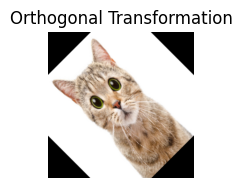

In [4]:
angle = 45  # Rotation angle in degrees
center = (resized_image.shape[1] // 2, resized_image.shape[0] // 2) #centre of resized image(length/2,breadth/2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)  #rotation
orthogonal_image = cv2.warpAffine(resized_image, rotation_matrix, (256, 256))

plt.subplot(2, 3, 2)
plt.imshow(orthogonal_image)
plt.title("Orthogonal Transformation")
plt.axis("off")


## B. Euclidean Transformation (Translation + Rotation)


### **Euclidean Transformation Formula**

Euclidean transformations combine **translation** and **rotation**, preserving distances and angles. The mathematical formulation for a Euclidean transformation is:

#### **Translation**
\[
\begin{aligned}
    \text{For a point } (x, y) \text{, the translated point } (x', y') \text{ is given by:} \\
    \begin{bmatrix}
    x' \\
    y'
    \end{bmatrix} =
    \begin{bmatrix}
    1 & 0 & t_x \\
    0 & 1 & t_y
    \end{bmatrix}
    \begin{bmatrix}
    x \\
    y \\
    1
    \end{bmatrix}
\end{aligned}
\]

Where:
- $(t_x)$: Horizontal translation (in pixels).

- $(t_y)$: Vertical translation (in pixels).

#### **Rotation**
\
\begin{aligned}
    \text{For the translated point, rotation by an angle } \theta \text{ about a center } (x_c, y_c) \text{ is:} \\
    \begin{bmatrix}
    x'' \\
    y''
    \end{bmatrix} =
    \begin{bmatrix}
    \cos \theta & -\sin \theta \\
    \sin \theta & \cos \theta
    \end{bmatrix}
    \begin{bmatrix}
    x' - x_c \\
    y' - y_c
    \end{bmatrix} +
    \begin{bmatrix}
    x_c \\
    y_c
    \end{bmatrix}
\end{aligned}


---

### **Use Cases**

Euclidean transformations are fundamental in image processing for tasks like:

1. **Image Alignment**:
   - Used in medical imaging or stitching panoramas to align images.

2. **Robotics and Navigation**:
   - Transform images or points in maps for localization and navigation.

3. **Motion Analysis**:
   - Analyze motion in videos by comparing transformed frames.

4. **Object Tracking**:
   - Simplify tracking by translating or rotating the reference object to the current frame.

5. **Augmentation in ML**:
   - Create realistic variations in datasets by combining translation and rotation.

---



(-0.5, 255.5, 255.5, -0.5)

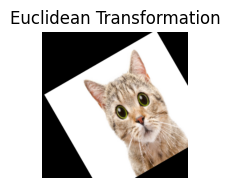

In [5]:
# Translate 30px right, 50px down
translation_matrix = np.float32([[1, 0, 30], [0, 1, 50]])
translated_image = cv2.warpAffine(resized_image, translation_matrix, (256, 256))

# 30 deg angle rotation
rotation_matrix_euclidean = cv2.getRotationMatrix2D(center, 30, 1)
euclidean_image = cv2.warpAffine(translated_image, rotation_matrix_euclidean, (256, 256))

plt.subplot(2, 3, 3)
plt.imshow(euclidean_image)
plt.title("Euclidean Transformation")
plt.axis("off")


## C. Affine Transformation


Affine transformations involve linear transformations followed by translation. The affine transformation preserves points, straight lines, and planes. The formula is given by:

#### **Affine Transformation Formula**
\
\begin{aligned}
    \text{For a point } (x, y) \text{, the transformed point } (x', y') \text{ is computed as:} \\
    \begin{bmatrix}
    x' \\
    y'
    \end{bmatrix} =
    \begin{bmatrix}
    a_{11} & a_{12} & t_x \\
    a_{21} & a_{22} & t_y
    \end{bmatrix}
    \begin{bmatrix}
    x \\
    y \\
    1
    \end{bmatrix}
\end{aligned}


Where:
- $(a_{11}, a_{12}, a_{21}, a_{22})$: Linear transformation components.
- $(t_x, t_y)$: Translation components.
- $(a_{11}, a_{12}, a_{21}, a_{22})$: Define Rotation, Scaling and Shearing

#### **Using Three Points**
The affine transformation is uniquely defined by the mapping of three non-collinear points:

$
\text{Input Points: } (x_1, y_1), (x_2, y_2), (x_3, y_3) \\
\text{Output Points: } (x_1', y_1'), (x_2', y_2'), (x_3', y_3')
$

The transformation matrix is computed using these corresponding points.

---

### **Use Cases**

Affine transformations are used in:

1. **Image Registration**:
   - Align images taken from different perspectives by mapping key points.

2. **Object Detection**:
   - Detect objects in transformed or skewed orientations.

3. **Augmentation for Neural Networks**:
   - Apply transformations like shearing, scaling, and rotation for diverse datasets.

4. **Graphics Design**:
   - Create artistic effects like perspective or skewing.

5. **Map Transformations**:
   - Adjust and align geographical data for different projections.

---




(-0.5, 255.5, 255.5, -0.5)

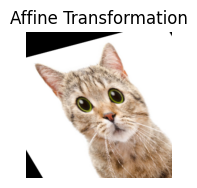

In [6]:
# Define three points and their affine transformations
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])  #ORIGINAL LOCATION OF THREE POINTS

pts2 = np.float32([[10, 100], [200, 50], [100, 250]]) #LOCATION WHERE WE WANT THESE POINTS TO BE AFTER AFFINE TRANSFORMATION
#here we have first defined the output of the affine transformation and the parameters will get automatically adjusted

affine_matrix = cv2.getAffineTransform(pts1, pts2)
affine_image = cv2.warpAffine(resized_image, affine_matrix, (256, 256))

plt.subplot(2, 3, 4)
plt.imshow(affine_image)
plt.title("Affine Transformation")
plt.axis("off")


## D. Projective Transformation


### **Mathematical Formula:**

The projective transformation (also known as a perspective transformation) maps points from one plane to another using a **homography matrix**. It can be represented as:

$$
\begin{bmatrix} u \\ v \\ 1 \end{bmatrix} = \mathbf{H} \cdot \begin{bmatrix} X \\ Y \\ 1 \end{bmatrix}
$$

Where:
- $(u,v)$ are the coordinates of the point in the transformed (output) image.
- $ (X,Y)$ are the coordinates of the point in the original (input) image.
- $(H)$ is the **3x3 homography matrix**:

$$
\mathbf{H} =
\begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{bmatrix}
$$

The homography matrix $(H)$ is computed using corresponding points in the input and output images. This transformation allows for changing the perspective view of the image.

Expanding this gives two equations per point correspondence:

$$
u_i = h_{11} X_i + h_{12} Y_i + h_{13}
$$

$$
v_i = h_{21} X_i + h_{22} Y_i + h_{23}
$$

$$
1 = h_{31} X_i + h_{32} Y_i + h_{33}
$$


### **Use Cases:**

1. **Image Warping**: Projective transformations can be used for image warping, where an image is transformed to change its perspective, such as correcting lens distortion or simulating different viewing angles.
   
2. **Panorama Stitching**: In applications like stitching multiple images into a single panoramic image, projective transformations are used to align the images as if they were captured from different points of view.

3. **Augmented Reality**: It is used to overlay virtual objects onto real-world scenes by mapping the scene to a new perspective.

4. **Camera Calibration**: Projective transformations help in calibrating cameras by analyzing how the world coordinates map to image coordinates.

5. **Geospatial Imaging**: In mapping and geospatial imaging, projective transformations are used to convert images from one coordinate system to another, such as when overlaying satellite images on maps.


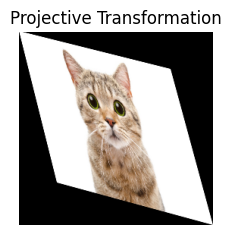

In [7]:
# Define four points and their projective transformations
pts1_proj = np.float32([[0, 0], [256, 0], [0, 256], [256, 256]]) #ORIGINAL LOCATION OF four POINTS
pts2_proj = np.float32([[0, 0], [200, 50], [50, 200], [256, 256]]) #LOCATION WHERE WE WANT THESE POINTS TO BE AFTER Projective TRANSFORMATION
projective_matrix = cv2.getPerspectiveTransform(pts1_proj, pts2_proj)
#here we have first defined the output of the affine transformation and the parameters will get automatically adjusted

projective_image = cv2.warpPerspective(resized_image, projective_matrix, (256, 256))

plt.subplot(2, 3, 5)
plt.imshow(projective_image)
plt.title("Projective Transformation")
plt.axis("off")
plt.tight_layout()
plt.show()


# **3. Fourier Transform**

### **Mathematical Formula:**

The Fourier Transform is a mathematical operation that transforms a time-domain signal (or spatial-domain image) into its frequency-domain representation. It decomposes a function into oscillatory components, making it easier to analyze the frequency content.

For a continuous function \( f(t) \), the Fourier Transform is given by:

$$
F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i \omega t} dt
$$

Where:
- $ f(t)$ is the time-domain or spatial-domain signal (input function),
- $ F(\omega) $ is the frequency-domain representation (output function),
-  $\omega $ is the angular frequency,
-  $e^{-i \omega t} $ is the complex exponential function (basis function) that oscillates at frequency $\omega$ .

For a discrete function (like digital images or signals), the Discrete Fourier Transform (DFT) is used, defined as:

$$
F[k] = \sum_{n=0}^{N-1} f[n] e^{-i \frac{2\pi}{N} k n}
$$

Where:
-   $ f[n]$ is the sampled input function (discrete signal),
-  $F[k] $ is the frequency-domain representation,
-  $N $ is the total number of samples,
- $ k $ is the index for the frequency components.

### **Use Cases:**



**Image Processing**: In image processing, Fourier Transform is used for tasks like image filtering, noise reduction, and compression. It helps by analyzing the frequency components of an image, where high-frequency components typically represent edges and fine details.




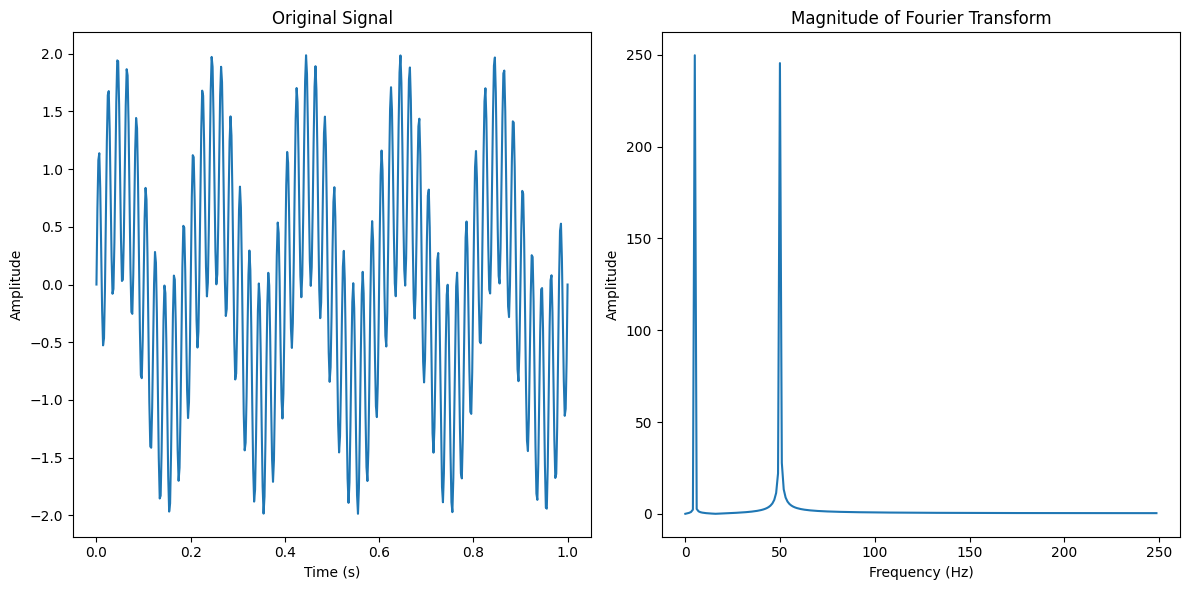

In [8]:
from numpy.fft import fft, ifft

t = np.linspace(0, 1, 500)
f1 = 5  # frequency of first sine wave
f2 = 50  # frequency of second sine wave
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Compute Fourier Transform
signal_fft = fft(signal)
frequencies = np.fft.fftfreq(len(signal), t[1] - t[0])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(signal_fft)[:len(frequencies)//2])  # Magnitude Spectrum
plt.title('Magnitude of Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### Code Explanation
####  Signal Generation:
A sample signal is created by adding two sine waves with different frequencies,  $f_1 = 5 $ $Hz$ and $f_2 = 50$ $Hz$.

#### Fourier Transform:
The Fourier Transform is computed using `np.fft.fft()`, which converts the signal from the time domain to the frequency domain.

#### Plotting:
The original signal is plotted on the left, and the magnitude of the Fourier Transform is plotted on the right, showing how the signal's frequency components are distributed.


# **4. Image Restoration**

* Image restoration refers to the process of recovering an image that has been degraded due to various factors such as noise, blurring, or distortions.
* The goal is to reverse or minimize the effects of degradation, so the image becomes clearer and more closely resembles the original.
* Common degradation factors include Gaussian noise, motion blur, and defocus blur.

### Mathematical Intuition
The process of image restoration typically assumes that the observed degraded image $g(x, y)$ can be modeled as a convolution of the original image $f(x, y)$ with a degradation function $h(x, y)$, plus some noise $n(x, y)$:


$g(x, y) = h(x, y) * f(x, y) + n(x, y)$


Where:

- $g(x, y)$ is the degraded image.
- $h(x, y)$ is the degradation function (e.g., motion blur, Gaussian blur).
- $f(x, y)$ is the original (ideal) image.
- $n(x, y)$ is the noise in the image.
- $*$ denotes convolution.

The goal of image restoration is to estimate $f(x, y)$ given $g(x, y)$, the degraded image, and the known degradation function $h(x, y)$.


## A. Wiener Filtering for Convolution

The **Wiener Filter** is used for image restoration to minimize the mean squared error (MSE) between the restored image $\hat{f}(x, y)$ and the original image $f(x, y)$.

The Wiener Filter in the frequency domain is given by:


$ H_w(u, v) = \frac{H^*(u, v)}{|H(u, v)|^2 + \frac{S_n(u, v)}{S_f(u, v)}}$


Where:

- $H(u, v)$ is the Fourier Transform of the degradation function $h(x, y)$.
- $H^*(u, v)$ is the complex conjugate of $H(u, v)$.
- $S_n(u, v)$ is the power spectral density of the noise $n(x, y)$.
- $S_f(u, v)$ is the power spectral density of the original image $f(x, y)$.
- $H_w(u, v)$ is the Wiener Filter in the frequency domain.

The restored image $\hat{F}(u, v)$ in the frequency domain is computed as:

$
\hat{F}(u, v) = H_w(u, v) \cdot G(u, v)
$

Where:

- $G(u, v)$ is the Fourier Transform of the degraded image $g(x, y)$.
- $\hat{F}(u, v)$ is the Fourier Transform of the restored image.

Finally, the restored image $\hat{f}(x, y)$ is obtained by applying the inverse Fourier Transform:

$
\hat{f}(x, y) = \mathcal{F}^{-1}(\hat{F}(u, v))
$

#### Purpose of Wiener Filter:

The Wiener Filter aims to balance the effects of noise reduction and image detail preservation. It is particularly useful when the degradation function $h(x, y)$ and noise characteristics are known or can be estimated.


In [11]:
from scipy.signal import convolve2d

In [12]:
image = cv2.imread('Cat.jpg', cv2.IMREAD_GRAYSCALE)

# Add motion blur to the image (example degradation)
size = 15
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

degraded_image = cv2.filter2D(image, -1, kernel_motion_blur)

In [17]:
# Wiener filter (simple implementation)
def wiener_filter(degraded_image, kernel, noise_variance=0.05):
    kernel_fft = np.fft.fft2(kernel, s=degraded_image.shape) #check formula
    image_fft = np.fft.fft2(degraded_image) #check formula
    kernel_conj = np.conj(kernel_fft) #check formula

    restored_fft = (kernel_conj * image_fft) / (np.abs(kernel_fft)**2 + noise_variance) #check formula

    restored_image = np.abs(np.fft.ifft2(restored_fft))
    return np.uint8(restored_image)

restored_image = wiener_filter(degraded_image, kernel_motion_blur)

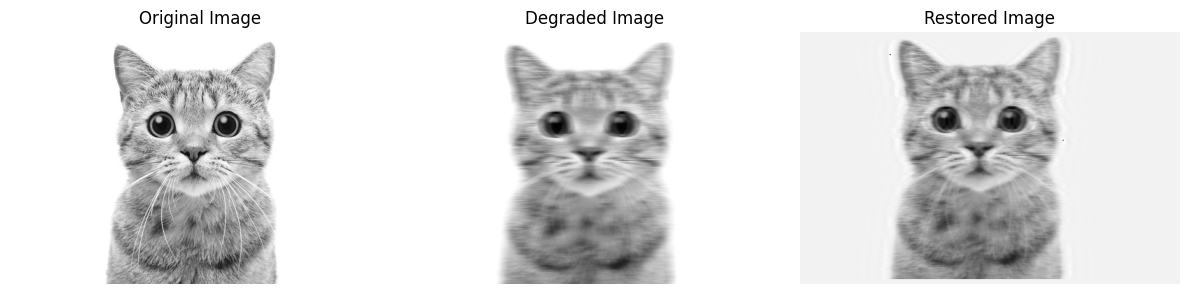

In [18]:
# Plot the images
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(degraded_image, cmap='gray')
plt.title('Degraded Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(restored_image, cmap='gray')
plt.title('Restored Image')
plt.axis('off')

plt.tight_layout()
plt.show()


# **5. Histogram Processing**

#### **Mathematical Formula**

The histogram of an image represents the frequency of occurrence of each intensity level in the image. For an image with intensity levels $( r_k)$ where $( k = 0, 1, \dots, L-1)$:

1. **Histogram Definition**:
  
   $h(r_k)$ = $n_k$

   - $(r_k)$: Intensity level $(k)$.
   - $(n_k)$: Number of pixels with intensity $(r_k)$.

2. **Normalized Histogram**:
   
   $pr_k = \frac{n_k}{n}$

   - $p(r_k)$: Probability of intensity level $r_k$.
   - $n$: Total number of pixels in the image.

3. **Cumulative Distribution Function (CDF)**:
  $
   c(r_k) = \sum_{j=0}^{k} p(r_j)
  $
   - $ c(r_k)$: Cumulative probability up to intensity level $ r_k$.

4. **Histogram Equalization**:
   $
   s_k = (L-1) \cdot c(r_k)
 $
   - $s_k$: Transformed intensity value after equalization.
   - $L$ : Total number of intensity levels.

---

#### **Use Cases**

1. **Enhancing Image Contrast**:
   - Histogram equalization can enhance the contrast of low-light or poorly contrasted images.

2. **Pattern Recognition**:
   - Helps in preprocessing images for better feature extraction in computer vision tasks.


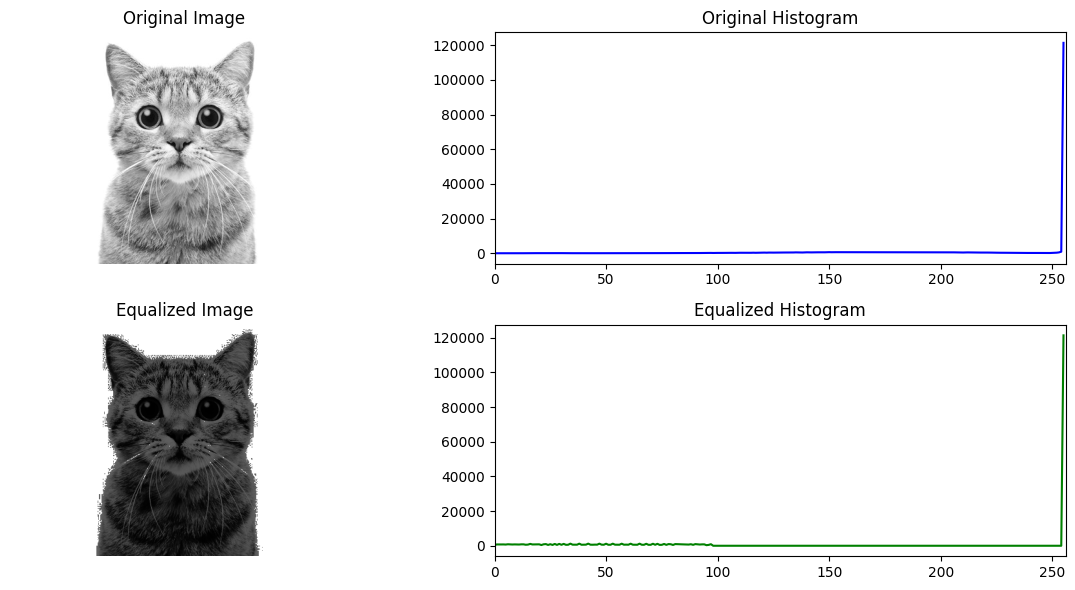

In [19]:
image = cv2.imread('Cat.jpg', cv2.IMREAD_GRAYSCALE)

# original histogram
hist_original, bins_original = np.histogram(image.flatten(), 256, [0, 256])

# Applying histogram equalization
equalized_image = cv2.equalizeHist(image)

# Computing the equalized histogram
hist_equalized, bins_equalized = np.histogram(equalized_image.flatten(), 256, [0, 256])

#original image and its histogram
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(hist_original, color='blue')
plt.title('Original Histogram')
plt.xlim([0, 256])

#equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='green')
plt.title('Equalized Histogram')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()
